In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "C:/Users/10331/OneDrive/Desktop/MBD project/"

In [3]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [137]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [138]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [140]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [141]:
cali_inf = us.loc[:,["Time","California"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,California
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,2
4,1/27/2020,0


In [142]:
cali_imp = impact.loc[impact.State == "California",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,98,California
1,3/16/2020,81,California
2,3/17/2020,99,California
3,3/17/2020,89,California
4,3/18/2020,89,California


In [143]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [125]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,98
1,3/16/2020,81
2,3/17/2020,99
3,3/17/2020,89
4,3/18/2020,89


In [126]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,66.5
1,10/10/2020,57.5
2,10/11/2020,57.5
3,10/12/2020,59.0
4,10/13/2020,64.5
...,...,...
210,9/5/2020,60.5
211,9/6/2020,53.0
212,9/7/2020,31.5
213,9/8/2020,65.5


In [134]:
cali_inf.to_csv(r"C:/Users/10331/OneDrive/Desktop/cali_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:/Users/10331/OneDrive/Desktop/cali_imp.csv", index=False, header=True)

In [190]:
cali = pd.read_csv(data_dir + "cali.csv")
cali.head()

,Date,California,PercentOfBaseline
0,3/16/2020,184,89.5
1,3/17/2020,143,94.0
2,3/18/2020,131,79.5
3,3/19/2020,178,73.5
4,3/20/2020,234,71.0


In [191]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [192]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [194]:
cali = cali.iloc[1:,:]
cali.head()

,index,California,PercentOfBaseline,change
1,1,353.2,69.4,1.029885
2,2,829.2,58.5,1.347678
3,3,1136.4,54.5,0.370478
4,4,1374.6,46.6,0.209609
5,5,1135.8,45.2,-0.173723


C:\Users\10331\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


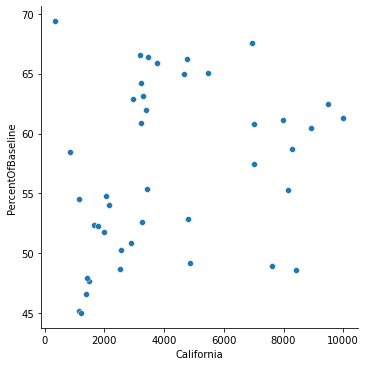

In [195]:
sns.relplot("California","PercentOfBaseline",data = cali)

C:\Users\10331\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='index', ylabel='change'>

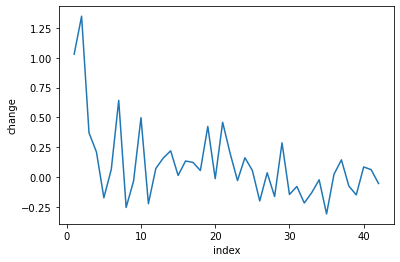

In [221]:
sns.lineplot("index","change",data = cali)

C:\Users\10331\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='index', ylabel='PercentOfBaseline'>

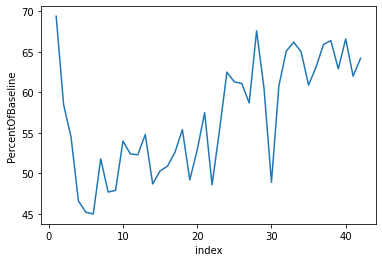

In [222]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [219]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.102
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              4.660
Date:                Sat, 21 Nov 2020   Prob (F-statistic):                      0.0368
Time:                        21:23:03   Log-Likelihood:                         -11.987
No. Observations:                  42   AIC:                                      25.97
Df Residuals:                      41   BIC:                                      27.71
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0019      0.001      2.159      0.037       0.000       0.004
==============================================================================
Omnibus:                       27.996   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.269
Skew:                           1.844   Prob(JB):                     1.64e-12
Kurtosis:                       7.173   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""